# 1. Import dan library yang diperlukan

- Import library yang diperlukan

In [1]:
import cv2
import math
import itertools
import os
import pandas as pd
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

from mediapipe import solutions

# 2. Take Video Data

Proses pengambilan data primer berupa data video oleh responden penelitian. 
Terdapat 4 skenario pengambilan yang dilakukan, yaitu:
1. Mata terbuka dengan menggunakan kacamata
2. Mata terbuka tanpa menggunakan kacamata
3. Mata tertutup dengan menggunakan kacamata
4. Mata tertutup tanpa menggunakan kacamata

- Mendefinisikan variabel untuk _library_ mixer

In [2]:
mixer.init()
step_sound = mixer.Sound('../Sounds/step.wav')
alarm_sound = mixer.Sound('../Sounds/ping.mp3')
start_sound = mixer.Sound('../Sounds/mh_notification.mp3')

- Mendefinisikan fungsi **set_resolution_with_aspect_ratio** untuk mengubah ukuran dan rasio dari frame kamera

In [3]:
def set_resolution_with_aspect_ratio(cap, target_height, aspect_ratio):
    # Calculate the corresponding width to maintain the aspect ratio
    target_width = int(target_height * aspect_ratio)

    # Set the desired resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, target_width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, target_height)

- Mengecek kondisi dan posisi tampilan kamera

In [7]:
cap = cv2.VideoCapture(0)

# Set the resolution 
# set_resolution_with_aspect_ratio(cap, 1080, 16/9)

# Add a delay to allow the camera to initialize (optional)
cv2.waitKey(1000)  # 1-second delay

# Get the resolution and fpsto confirm the change
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Camera resolution: {width} x {height}")
print(f"Frames per second: {fps}")

while True:
    ret, frame = cap.read()

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Camera resolution: 640 x 480
Frames per second: 30.0


- Mendefinisikan variabel untuk proses pengambilan data video

In [2]:
# penomoran subject dalam video
subject_number = '10'

# pemberian jenis subject
subject_gender = 'male'

# apakah subject menggunakan kacamata atau tidak? 
subject_type = ['glasses', 'no-glasses']

# jenis kelas data
status_type = ['awake', 'drowsy']

# menentukan lokasi data
dataset_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer"

video_path = os.path.join(dataset_path, 'video')

# membuat lokasi untuk menyimpan data jika folder belum terbuat
if not os.path.exists(video_path):
    os.makedirs(video_path)
    
# jenis font yang akan digunakan
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

- Melakukan proses pengambilan video 

In [13]:
for status in status_type:
    for subject in subject_type: 
        cap = cv2.VideoCapture(0)
        fps = cap.get(cv2.CAP_PROP_FPS)
        fourcc = cv2.VideoWriter_fourcc(*'XVID')

        print(f"Camera frames per second: {fps}")

        output_folder = os.path.join(video_path, status, subject)

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        print(f'Ready to take the {status}-{subject} data type?')
        confirmation = input(f'{status}-{subject}') 

        if confirmation == 'yes':
            time.sleep(3)
            start_sound.play()
            for i in range (5):
                step_sound.play()
                frame_count = 0

                file_name = f'{subject_number}_{subject_gender}_{subject}_{status}_{i+1}'
                output_path = os.path.join(output_folder, file_name)

                # Define the codec and create VideoWriter object
                output = cv2.VideoWriter(f'{output_path}.avi', fourcc, 30, (640, 480))

                while True:
                    ret, frame = cap.read()
                    cv2.putText(frame, f'{file_name}.avi', (20,20), font, 0.7, (0,0,0), 1, cv2.LINE_AA)

                    if ret:
                        output.write(frame)
                        frame_count += 1
                        cv2.imshow('frame', frame)

                        # set jumlah frame yang ingin diambil
                        if frame_count == 6*fps:
                            break

                        # press 'q' to exit
                        if cv2.waitKey(1) & 0xFF == ord('q'):
                            break

                alarm_sound.play()
                time.sleep(3)

            # Release everything when done
            cap.release()
            output.release()
            cv2.destroyAllWindows()

        else:
            pass

Camera frames per second: 30.0
Ready to take the awake-glasses data type?


awake-glasses yes


Camera frames per second: 30.0
Ready to take the awake-no-glasses data type?


awake-no-glasses yes


Camera frames per second: 30.0
Ready to take the drowsy-glasses data type?


drowsy-glasses yes


Camera frames per second: 30.0
Ready to take the drowsy-no-glasses data type?


drowsy-no-glasses yes


# 3. Convert Video Data to Image Data

Proses pengubahan data dalam bentuk video menjadi data berbentuk gambar.

Data gambar yang dihasilkan diperoleh dengan mengambil cuplikan _frame_ dari data video setiap interval waktu yang telah ditentukan (contohnya setiap 0,5 detik).

- Mendefinisikan variabel untuk lokasi _input_ dan _output_ dari data

In [3]:
image_path = os.path.join(dataset_path, 'image')
    
if not os.path.exists(image_path):
    os.makedirs(image_path)

- Mengubah data video menjadi data gambar

In [15]:
for subject in subject_type 
    for status in status_type: 
        input_folder = os.path.join(video_path, status, subject)
        output_folder = os.path.join(image_path, status, subject)

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        for video_file in os.listdir(input_folder):

            file_name = f'{video_file}'
            new_file_name = file_name[:-4]
            video_file_path = os.path.join(input_folder, video_file)
            cap = cv2.VideoCapture(video_file_path)

            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = 0

            number_interval = 1

            file_index = 1

            # to capture frames every 0.5 seconds
            frame_interval = 0.5 

            while cap.isOpened():
                ret, frame = cap.read()

                if not ret:
                    break

                if frame_count % (frame_interval * fps) == 0:
                    image_file = os.path.join(output_folder, f'{new_file_name}_{number_interval}.jpg')

                    cv2.imwrite(image_file, frame)
                    print(f'Saved {image_file}')

                frame_count += 1

                if frame_count % (frame_interval * fps) == 0:
                    number_interval += 1

                #if number_interval == 10:
                    #number_interval = 0
            cap.release()

        print("Image conversion complete.")

Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_1.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_2.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_3.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_4.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_5.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_6.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_7.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_8.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_glasses_awake_1_9.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image\awake\10_male_gl

# 4. Augmented Image

Proses augmentasi data gambar yang dihasilkan pada tahap sebelumnya.

Augmentasi data gambar yang dilakukan bertujuan untuk memperkaya variasi jenis data gambar yang dimiliki.

- Mendefinisikan pilihan - pilihan untuk proses augmentasi data gambar

In [4]:
# Define augmentation options
# 0=False; 1=True
augmentation_options = {
    "brightness_down": [0, 1],
    "contrast_up": [0, 1],
    "flip_horizontal": [0, 1],
}

- Membuat daftar kombinasi dari pilihan yang digunakan untuk proses augmentasi data gambar

In [5]:
augmentation_combination = list(itertools.product(*augmentation_options.values()))
print((augmentation_combination))
print(len((augmentation_combination)))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
8


- Mendefinisikan fungsi **augment_image** untuk melakukan proses augmentasi pada data gambar

In [6]:
def augment_image(image, 
                  brightness_down=0, 
                  contrast_up=0, 
                  flip_horizontal=0):

    if brightness_down == 1:
        brightness_factor = 0.5  # Make the image 50% darker
        image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
    
    if contrast_up == 1:
        contrast_factor = 1.5  # Adjust contrast (you can change this value)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = np.clip(gray * contrast_factor, 0, 255).astype(np.uint8)
        image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        
    if flip_horizontal == 1:
        image = cv2.flip(image, 1)  # 1 for horizontal flip
        
    return image

- Mendefinisikan variabel untuk lokasi _input_ dan _output_ dari data

In [4]:
augmented_image_path = os.path.join(dataset_path, 'image augmented')

if not os.path.exists(augmented_image_path):
    os.makedirs(augmented_image_path)

- Melakukan proses konversi data gambar original menjadi data gambar yang telah diaugmentasi

In [20]:
for subject in subject_type:
    for status in status_type: 
        input_folder = os.path.join(image_path, status, subject)
        output_folder = os.path.join(augmented_image_path, status, subject)
        
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        for file in os.listdir(input_folder):

            file_name = f'{file}'
            new_file_name = file_name[:-4]
            image_file_path = os.path.join(input_folder, file)
            image = cv2.imread(image_file_path)

            for combination in augmentation_combination:

                augmented_image = augment_image(image, 
                                                combination[0], 
                                                combination[1], 
                                                combination[2])
                                                
                image_file = os.path.join(output_folder, 
                                          f'{new_file_name}_{combination[0]}_{combination[1]}_{combination[2]}.jpg')

                cv2.imwrite(image_file, augmented_image)

                print(f'Saved {image_file}')

        print("Image conversion complete.")

Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_0_0_0.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_0_0_1.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_0_1_0.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_0_1_1.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_1_0_0.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_1_0_1.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_1_1_0.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\awake\10_male_glasses_awake_1_1_1_1_1.jpg
Saved D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Pri

# 5. Data Preparation

Melakukan proses penyiapan data supaya dapat digunakan dalam proses pelatihan dan pengujian model

## 5.1. Mendefinisikan fungsi yang diperlukan dalam proses data preparation

- Mendefinisikan beberapa fungsi pada _library_ mediapipe dan matplotlib

In [5]:
mp_facemesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

%matplotlib inline

- Mendefinisikan titik _landmark_ beserta indeksnya

In [6]:
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) 
 
# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))
 
# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)
 
# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

- Mendefinisikan fungsi **distance** untuk menghitung jarak antara dua titik

In [7]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

- Mendefinisikan fungsi **get_ear** untuk mengkalkulasi nilai *eye aspect ratio* untuk satu mata

In [8]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.
 
    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame
 
    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, 
                                             frame_width, frame_height)
            coords_points.append(coord)
 
        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])
 
        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)
 
    except:
        ear = 0.0
        coords_points = None
 
    return ear, coords_points

- Mendefinisikan fungsi **calculate_avg_ear** untuk mengkalkulasi nilai rata - rata *eye aspect ratio* untuk kedua mata

In [9]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""
 
    left_ear, left_lm_coordinates = get_ear(
                                      landmarks, 
                                      left_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks, 
                                      right_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0
 
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

- Mendefinisikan fungsi **plot** untuk memvisualisasi gambar menggunakan implementasi _library_ mediapipe

In [10]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
    EAR,
    save_path=None
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt 
     
     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
     
    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen
 
    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, 
        circle_radius=ts_circle_radius, 
        color=(255, 255, 255)
    )
 
    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")
 
    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )
 
    # Get the object which holds the x, y, and z coordinates for each landmark
    landmarks = face_landmarks.landmark
 
    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.
 
    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(image_eye_lmks, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
            
            cv2.putText(img_eye_lmks_chosen,
                        f"EAR: {round(EAR, 2)}", (480, 470),
                        cv2.FONT_HERSHEY_COMPLEX, 0.9,
                        (255,255,255),2)
 
    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")
 
    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")
 
    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    
    # Save the figure to a local file
    if save_path:
        plt.savefig(save_path)
    
    plt.show()
    plt.close()
    return

- Mendefinisikan fungsi **get_two_first_letter_of_filename** untuk memperoleh dua karakter pertama pada sebuah nama dokumen

In [43]:
def get_two_first_letter_of_filename(file_path):
    # Get the base name of the file (excluding the path)
    file_name = os.path.basename(file_path)
    
    # Extract the first letter of the file name
    first_letter = file_name[0]
    
     # Extract the second letter of the file name
    second_letter = file_name[1]
    
    if second_letter == '_':
        return first_letter
    else:
        return first_letter + second_letter

## 5.2. Menjalankan implementasi _library mediapipe_ untuk memperoleh nilai EAR

- Mendefinisikan variabel untuk lokasi _input_ dari sampel data implementasi _library_ mediapipe

In [15]:
image_with_mediapipe_path = os.path.join(dataset_path, 'mediapipe sample image')

if not os.path.exists(image_with_mediapipe_path):
    os.makedirs(image_with_mediapipe_path)

- Menampilkan sampel gambar dengan implementasi _library_ mediapipe

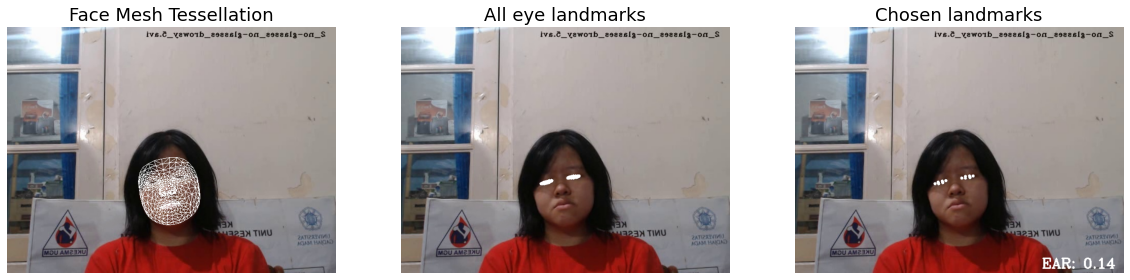

EAR of the image is approximately around 0.14


In [17]:
sample_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Dataset\Data Primer\image augmented\drowsy\no-glasses\2_female_no-glasses_drowsy_5_4_0_0_1.jpg"

image = cv2.imread(sample_path)

file_name = '2_drowsy_glasses'

output_path = os.path.join(image_with_mediapipe_path, file_name)

with mp_facemesh.FaceMesh(
                static_image_mode=False,        # Default=False
                max_num_faces=1,                # Default=1
                refine_landmarks=False,         # Default=False
                min_detection_confidence=0.35,   # Default=0.5
                min_tracking_confidence= 0.5,   # Default=0.5
            ) as face_mesh:
    
                if image is not None: 
                    

                    # imgW, imgH, _ = image.shape
                    imgH, imgW, _ = image.shape

                     # Creating a copy of the original image for plotting the EAR value
                    custom_chosen_lmk_image = image.copy()
                    
                    # Recolor feed to RGB
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                    image.flags.writeable = False

                    # Make detections
                    results = face_mesh.process(image).multi_face_landmarks

                    # Recolor image back to BGR
                    image.flags.writeable = True
                    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                    # If detections are available.
                    if results:
                        # Iterate over detections of each face. Here, we have max_num_faces=1, 
                        # So there will be at most 1 element in 
                        # the 'results.multi_face_landmarks' list            
                        # Only one iteration is performed.
                        for face_id, face_landmarks in enumerate(results):    
                            
                            landmarks = face_landmarks.landmark
                            EAR, _ = calculate_avg_ear(
                                                landmarks, 
                                                chosen_left_eye_idxs, 
                                                chosen_right_eye_idxs, 
                                                imgW, 
                                                imgH)

                            _ = plot(
                                img_dt=image.copy(), 
                                face_landmarks=face_landmarks, 
                                save_path=output_path,
                                EAR=EAR
                            ) 
                            
                            print(f"EAR of the image is approximately around {round(EAR, 2)}")
                            
                    if results is None:
                        print('Image is not detected by mediapipe library')

- Mendefinisikan _list_ untuk menampung nomor subject, nilai _eye aspect ratio_ (EAR), dan kondisi pengemudi yang dihasilkan

In [49]:
# Storage
data_subject_num =[]
data_ear = []
data_status = []
data_subject_type = []

- Mendefinisikan _list_ untuk menampung file yang _error_ atau tidak terdeteksi

In [50]:
no_facial_landmark_detected_file = []
error_detected_file = []

- Menjalankan proses kalkulasi nilai EAR serta memberikan status kondisi pengemudi dan nomor subject

In [51]:
success_load_image = 0
failed_load_image = 0
no_facial_landmark_detected_image = 0

for status in status_type: 
    for subject in subject_type:
        input_folder = os.path.join(augmented_image_path, status, subject)

        for file in os.listdir(input_folder):

            # Get subject number from file name
            letter = get_two_first_letter_of_filename(file)
            
            # Convert the data type from string into integer
            subject_number = int(letter)
            
            # Load Image
            input_file = os.path.join(input_folder, file)
            image = cv2.imread(input_file)

            # Initiate face model
            with mp_facemesh.FaceMesh(
                static_image_mode=False,        # Default=False
                max_num_faces=1,                # Default=1
                refine_landmarks=False,         # Default=False
                min_detection_confidence=0.35,   # Default=0.5
                min_tracking_confidence= 0.5,   # Default=0.5
            ) as face_mesh:

                if image is not None: 
                    success_load_image += 1

                    # imgW, imgH, _ = image.shape
                    imgH, imgW, _ = image.shape

                    # Recolor feed to RGB
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                    image.flags.writeable = False

                    # Make detections
                    results = face_mesh.process(image).multi_face_landmarks

                    # Recolor image back to BGR
                    image.flags.writeable = True
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                    # Calculate EAR
                    if results:
                        for face_id, face_landmarks in enumerate(results):
                            landmarks = face_landmarks.landmark
                            EAR, _ = calculate_avg_ear(
                                                landmarks, 
                                                chosen_left_eye_idxs, 
                                                chosen_right_eye_idxs, 
                                                imgW, 
                                                imgH)

                            # Add the subject number into list data
                            data_subject_num.append(subject_number)
                            
                            # Add the subject type into list data
                            data_subject_type.append(subject)
                            
                            # Add the EAR and person status to list data
                            data_ear.append(EAR)
                            data_status.append(status)
                            
                            # Print the subject number, EAR value, and driver status
                            print(f"Subject: {subject_number}; EAR: {round(EAR, 2)}; Status: {status}; Type: {subject}")
                    else:
                        # No facial landmarks detected
                        no_facial_landmark_detected_image += 1
                        no_facial_landmark_detected_file.append(input_file)
                        print(f"No facial landmarks detected.")

                else:
                    # Image loading failed
                    failed_load_image += 1
                    error_detected_file.append(input_file)
                    print("Error: Unable to load the image.")

Subject: 10; EAR: 0.12; Status: awake; Type: glasses
Subject: 10; EAR: 0.14; Status: awake; Type: glasses
Subject: 10; EAR: 0.1; Status: awake; Type: glasses
Subject: 10; EAR: 0.12; Status: awake; Type: glasses
Subject: 10; EAR: 0.1; Status: awake; Type: glasses
Subject: 10; EAR: 0.13; Status: awake; Type: glasses
Subject: 10; EAR: 0.08; Status: awake; Type: glasses
Subject: 10; EAR: 0.13; Status: awake; Type: glasses
Subject: 10; EAR: 0.16; Status: awake; Type: glasses
Subject: 10; EAR: 0.17; Status: awake; Type: glasses
Subject: 10; EAR: 0.14; Status: awake; Type: glasses
Subject: 10; EAR: 0.17; Status: awake; Type: glasses
Subject: 10; EAR: 0.15; Status: awake; Type: glasses
Subject: 10; EAR: 0.17; Status: awake; Type: glasses
Subject: 10; EAR: 0.15; Status: awake; Type: glasses
Subject: 10; EAR: 0.16; Status: awake; Type: glasses
Subject: 10; EAR: 0.14; Status: awake; Type: glasses
Subject: 10; EAR: 0.15; Status: awake; Type: glasses
Subject: 10; EAR: 0.12; Status: awake; Type: gla

- Menampilkan informasi terkait proses pengolahan data

In [52]:
print(f'Total successfull loaded image is {success_load_image}')
print(f'Total failed loaded image is {failed_load_image}')
print(f'Total image with no facial landmark detected is {no_facial_landmark_detected_image}')

Total successfull loaded image is 19200
Total failed loaded image is 0
Total image with no facial landmark detected is 0


- Menampilkan informasi terkait gambar yang tidak terdeteksi oleh _library_ mediapipe

In [53]:
print(f'Jumlah gambar yang tidak terdeteksi oleh library mediapipe adalah {len(no_facial_landmark_detected_file)} gambar')

print('\nLokasi gambar yang tidak terdeteksi oleh library mediapipe adalah:')

if len(no_facial_landmark_detected_file) != 0:
    
    for value in no_facial_landmark_detected_file:
        print(value)
        
else:
    print("Tidak ada gambar yang tidak terdeteksi oleh library mediapipe")

Jumlah gambar yang tidak terdeteksi oleh library mediapipe adalah 0 gambar

Lokasi gambar yang tidak terdeteksi oleh library mediapipe adalah:
Tidak ada gambar yang tidak terdeteksi oleh library mediapipe


## 5.3. Membuat dan menampilkan informasi dataframe yang memuat nilai EAR, kondisi subjek, dan nomor subjek

- Membuat dataframe yang memuat nilai EAR beserta status kondisi yang diberikan

In [54]:
# create a table as a pandas DataFrame
data = {
    "Subject": data_subject_num,
    "EAR": data_ear,
    "Person Status": data_status,
    "Person Type": data_subject_type
}

df = pd.DataFrame(data)

- Menampilkan dataframe yang telah dibuat

In [55]:
df

Subject       EAR Person Status Person Type
0           10  0.115744         awake     glasses
1           10  0.137296         awake     glasses
2           10  0.103291         awake     glasses
3           10  0.124150         awake     glasses
4           10  0.097851         awake     glasses
...        ...       ...           ...         ...
19195        9  0.178450        drowsy  no-glasses
19196        9  0.153190        drowsy  no-glasses
19197        9  0.165020        drowsy  no-glasses
19198        9  0.123640        drowsy  no-glasses
19199        9  0.145185        drowsy  no-glasses

[19200 rows x 4 columns]

- Melihat informasi terkait dataframe

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject        19200 non-null  int64  
 1   EAR            19200 non-null  float64
 2   Person Status  19200 non-null  object 
 3   Person Type    19200 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 600.1+ KB


- Menampilkan histogram dari dataframe yang dibuat

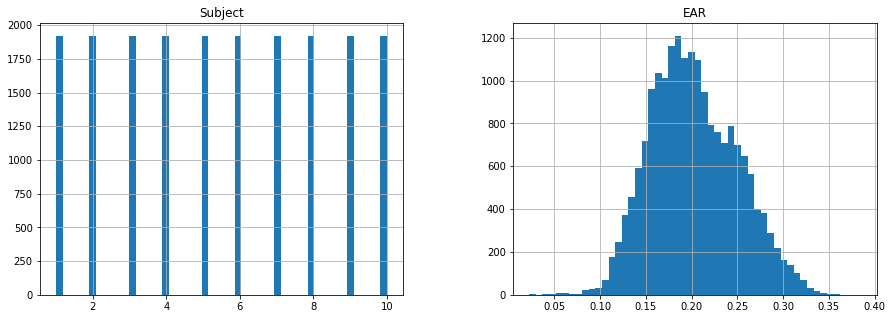

In [57]:
df.hist(bins=50, figsize=(15,5))
plt.show()

- Menampilkan diagram batang dari dataframe yang dibuat

        jumlah sampel  persentase
awake            9600        50.0
drowsy           9600        50.0


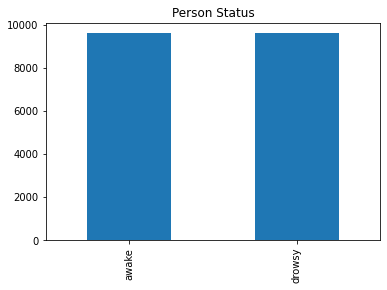

In [58]:
feature = 'Person Status'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data_feature = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data_feature)
count.plot(kind='bar', title=feature);

- Menyimpan dataframe ke dalam berkas csv

In [59]:
# Dataframes
output_csv = 'Data csv'
csv_file_name = 'df_10_subject.csv'

if not os.path.exists(output_csv):
    os.makedirs(output_csv)

csv_file_path = os.path.join(output_csv, csv_file_name)
df.to_csv(csv_file_path, index=False)